In [1]:
import csv
import pandas as pd
df = pd.read_excel('Classification_clean.xlsx')
df.shape

(674, 13)

In [34]:
df.head()

,ID_CF,FirstEpisodes_FEP__HealthyControl_HC_,Diagnosis,Gender,Age,Site 1,Site 2,Site 3,Site 4,Site 5,Site 6,Site 7,Euler
0,CF_001,FEP,3,0,23.857632,0,0,0,0,0,0,0,-21
1,CF_002,FEP,3,0,28.952772,0,0,0,0,0,0,0,-33
2,CF_003,FEP,1,0,20.199863,0,0,0,0,0,0,0,-55
3,CF_004,FEP,1,0,28.517454,0,0,0,0,0,0,0,-26
4,CF_005,FEP,2,1,39.101985,0,0,0,0,0,0,0,-24


In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

ID_CF                                    0
FirstEpisodes_FEP__HealthyControl_HC_    0
Diagnosis                                0
Gender                                   0
Age                                      0
Site 1                                   0
Site 2                                   0
Site 3                                   0
Site 4                                   0
Site 5                                   0
Site 6                                   0
Site 7                                   0
Euler                                    0
dtype: int64

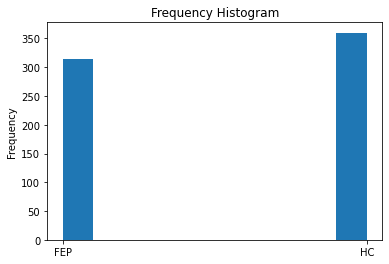

In [5]:
import matplotlib.pyplot as plt
y=df['FirstEpisodes_FEP__HealthyControl_HC_']
plt.hist(y)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [22]:
df['Gender'].value_counts()

0    364
1    310
Name: Gender, dtype: int64

In [23]:
df['Age'].value_counts()

23.000000    57
22.000000    51
26.000000    39
27.000000    38
24.000000    37
             ..
26.250000     1
23.670000     1
28.952772     1
31.500000     1
26.920000     1
Name: Age, Length: 144, dtype: int64

In [7]:
df.describe()

,Diagnosis,Gender,Age,Site 1,Site 2,Site 3,Site 4,Site 5,Site 6,Site 7,Euler
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.0,674.000000
mean,1.115727,0.459941,27.138008,0.185460,0.086053,0.265579,0.170623,0.068249,0.154303,0.0,-84.264095
std,2.006295,0.498763,6.868340,0.388959,0.280651,0.441969,0.376459,0.252360,0.361507,0.0,67.478036
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-585.000000
25%,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-98.750000
50%,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-64.000000
75%,1.000000,1.000000,30.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,-43.000000
max,7.000000,1.000000,62.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,22.000000


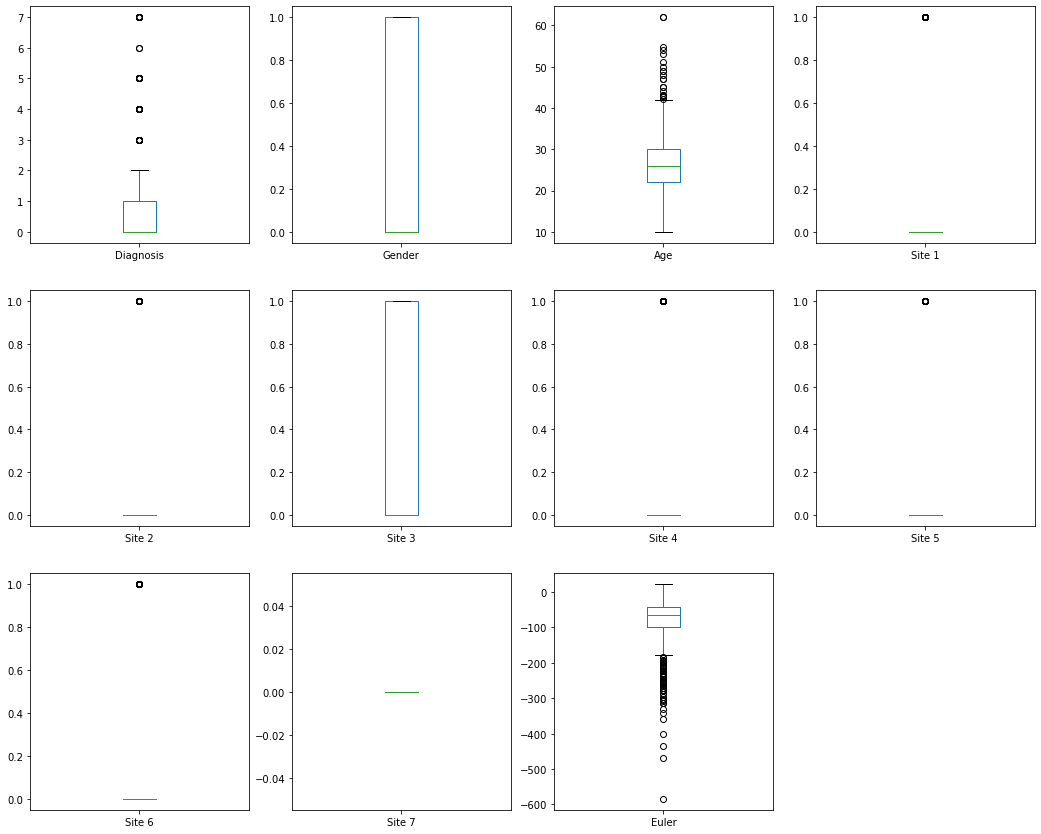

In [8]:
import seaborn as sns
params = {'axes.titlesize':'35',
          'xtick.labelsize':'26',
          'ytick.labelsize':'26'}
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,figsize=(18,20))
plt.show()

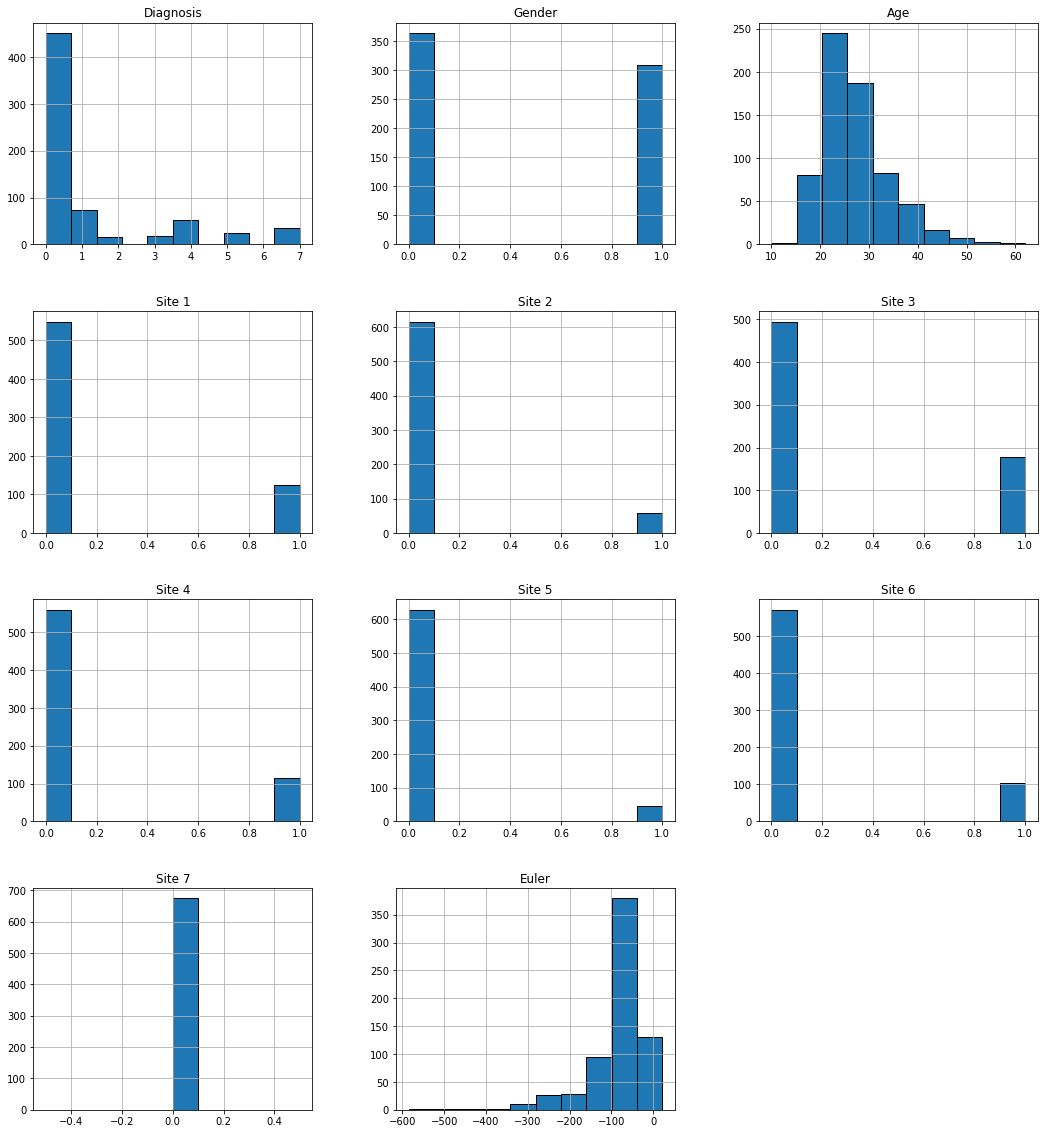

In [19]:
params = {'axes.titlesize':'35',
          'xtick.labelsize':'26',
          'ytick.labelsize':'26'}
df.hist(figsize=(18,20), ec="k")
plt.show()

In [28]:
from sklearn import preprocessing
df1=df.apply(preprocessing.LabelEncoder().fit_transform)

Text(0.5, 1.0, 'Correlation Heatmap')

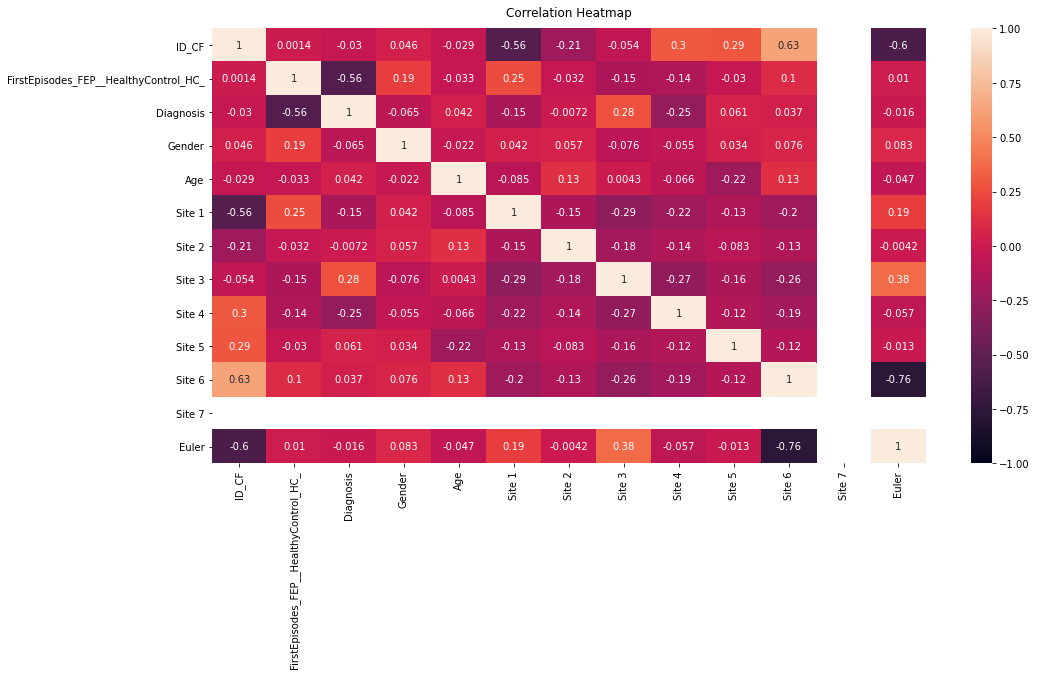

In [29]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
X = df.drop(['FirstEpisodes_FEP__HealthyControl_HC_','ID_CF'], axis=1)
y = df['FirstEpisodes_FEP__HealthyControl_HC_']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7,shuffle=True)

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
NB = GaussianNB().fit(X_train, y_train)
predicted= NB.predict(X_test)
print("GuassianNB Accuracy:",metrics.accuracy_score(y_test, predicted))

GuassianNB Accuracy: 0.7481481481481481


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         FEP       0.89      0.59      0.71        70
          HC       0.67      0.92      0.78        65

    accuracy                           0.75       135
   macro avg       0.78      0.75      0.74       135
weighted avg       0.79      0.75      0.74       135



In [13]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
predicted1= svc.predict(X_test)
print("SVM Accuracy:",metrics.accuracy_score(y_test, predicted1))

SVM Accuracy: 0.8666666666666667


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted1))

              precision    recall  f1-score   support

         FEP       0.87      0.87      0.87        70
          HC       0.86      0.86      0.86        65

    accuracy                           0.87       135
   macro avg       0.87      0.87      0.87       135
weighted avg       0.87      0.87      0.87       135



NB: 0.799686
sVM: 0.541754


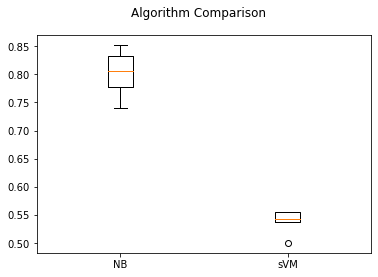

In [15]:
from sklearn.model_selection import cross_val_score
models = []
models.append(('NB', GaussianNB()))
models.append(('sVM', svm.SVC()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

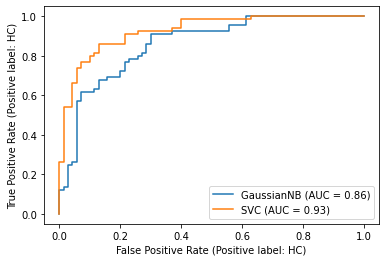

In [16]:
from sklearn.metrics import plot_roc_curve
roc=plot_roc_curve(NB, X_test,y_test)
plot_roc_curve(svc, X_test,y_test,ax=roc.ax_)

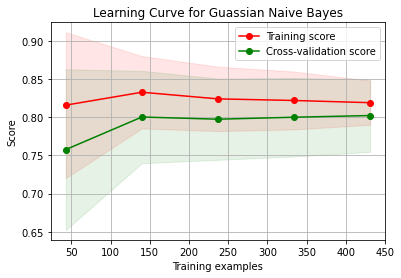

In [17]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
#train_sizes=np.linspace(.1, 1.0, 5)
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plt.figure()
plt.title("Learning Curve for Guassian Naive Bayes")
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(NB, X_train, y_train, cv=cv, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

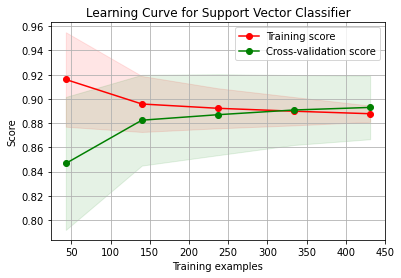

In [18]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
#train_sizes=np.linspace(.1, 1.0, 5)
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plt.figure()
plt.title("Learning Curve for Support Vector Classifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(svc, X_train, y_train, cv=cv, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

In [47]:
from sklearn.model_selection import train_test_split
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
X = df.drop(['FirstEpisodes_FEP__HealthyControl_HC_','ID_CF','Age'], axis=1)
y = df['FirstEpisodes_FEP__HealthyControl_HC_']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7,shuffle=True)

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
NB = GaussianNB().fit(X_train, y_train)
predicted= NB.predict(X_test)
print("GuassianNB Accuracy:",metrics.accuracy_score(y_test, predicted))

GuassianNB Accuracy: 0.8074074074074075


In [49]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
predicted1= svc.predict(X_test)
print("SVM Accuracy:",metrics.accuracy_score(y_test, predicted1))

SVM Accuracy: 0.8666666666666667


In [50]:
from sklearn.model_selection import train_test_split
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
X = df.drop(['FirstEpisodes_FEP__HealthyControl_HC_','ID_CF','Age','Euler'], axis=1)
y = df['FirstEpisodes_FEP__HealthyControl_HC_']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7,shuffle=True)

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
NB = GaussianNB().fit(X_train, y_train)
predicted= NB.predict(X_test)
print("GuassianNB Accuracy:",metrics.accuracy_score(y_test, predicted))

GuassianNB Accuracy: 0.8148148148148148


In [52]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
predicted1= svc.predict(X_test)
print("SVM Accuracy:",metrics.accuracy_score(y_test, predicted1))

SVM Accuracy: 0.8666666666666667
